# 1.- Obtención de datos y procesamiento inicial

## 1.1 - Obtención

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("datos/SDSS-DR14.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## 1.2 - Verificación de equilibro de las clases

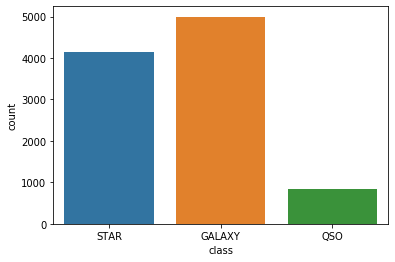

In [11]:
sns.countplot(x="class", data=df)
plt.show()

Como se puede observar, la QSO tiene una cantidad menor de muestras con respecto a las demás clases. un Se necesitará hacer un oversampling más adelante

## 1.3 - Verificando si camcol es una característica calificativa

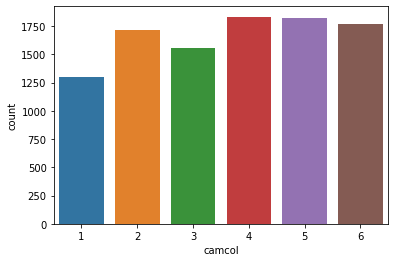

In [12]:
sns.countplot(x="camcol", data=df)
plt.show()

Estamos frente a una variable discreta, por lo que si podemos llegar a la conclusión de que en este caso puede ser una característica calificativa

## 1.4 - En busca de posibles características que no aporten al aprendizaje

In [13]:
df.groupby("class").mean()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
class,,,,,,,,,,,,,,,,,
GALAXY,1.237650e+18,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,996.711685,301.0,3.654662,300.963585,5.379141e+17,0.080325,477.680672,52030.280912,340.108844
QSO,1.237650e+18,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,1036.120000,301.0,3.694118,304.983529,1.447231e+18,1.218366,1285.305882,52694.289412,381.558824
STAR,1.237650e+18,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,950.886561,301.0,3.632225,303.552264,3.018202e+18,0.000043,2680.613198,54093.892823,362.838391


Se puede observar que las características "objid" y "rerun" posiblemente no sean útiles en el aprendizaje para la IA.

## 1.5 - Función de conteo

In [14]:
def counts(rows, columna, modo, valor):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    rows = rows[columna]
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row
        if(modo == "atipico<="):
            if label <= valor:
                if label not in counts:
                    counts[label] = 0
                counts[label] += 1
        elif(modo == "atipico>="):
            if label >= valor:
                if label not in counts:
                    counts[label] = 0
                counts[label] += 1
        else:
            if label not in counts:
                counts[label] = 0
            counts[label] += 1
    return counts

# Revisando las columnas sospechosas

Si se confirma que las características no aportan, se se eliminarán las columnas de el dataframe

In [15]:
counts(df, "objid", "","") #Esta característica es igual en todas las clases, por lo que procedo a borrar

{1.23765e+18: 10000}

In [16]:
df = df.drop(labels=["objid"], axis=1)
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [17]:
counts(df, "rerun","","") #Todas las clases tiene esta misma características

{301: 10000}

In [18]:
df = df.drop(labels="rerun", axis=1)
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [19]:
#Se usa get dummies en la columna camcol, ya que parece ser una característica calificativa
camcol = pd.get_dummies(df['camcol'], prefix = "camcol")
df = pd.concat([df,camcol], axis=1)
df.head()
df = df.drop(labels=["camcol"],axis=1)

# 2.- Aprendizaje con los datos en bruto

Probaré el aprendizaje sin analizar ni limpiar los datos primero, pero si balancearé los datos, ya que en el siguiente panel, se puede observar que QSO no tiene suficientes datos 

## 2.1 - Oversampling a la clase QSO

In [25]:
print("Dataframe original:", counts(df,"class","",""))

#Balanceamos un poco QSO para que al menos tenga la misma cantidad de muestras que STAR:
STAR = df[df["class"] == "STAR"]
GALAXY = df[df["class"] == "GALAXY"]
QSO = df[df["class"] == "QSO"]

QSO_aumentado = QSO.sample(4152, replace = True)

df_oversampled = pd.concat([STAR, GALAXY, QSO_aumentado], axis= 0)
print("Dataframe oversampled:", counts(df_oversampled,"class","",""))

Dataframe original: {'STAR': 4152, 'GALAXY': 4998, 'QSO': 850}
Dataframe oversampled: {'STAR': 4152, 'GALAXY': 4998, 'QSO': 4152}


# 2.2 - Aprendizaje sin oversampling

In [26]:
#Si probamos aplicar el aprendizaje sin el oversampling:
df.head()
#Separamos las características de las clases
Y = df.iloc[:,10]
X = df.drop(labels="class", axis=1)
#X.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5, random_state=25)

In [27]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Predicción y matriz de confusión
Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))

[[2429   44    2]
 [  42  398    0]
 [   8    0 2077]]
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      2475
         QSO       0.90      0.90      0.90       440
        STAR       1.00      1.00      1.00      2085

    accuracy                           0.98      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.98      0.98      0.98      5000



## 2.3 - Aprendizaje con oversampling

La precisión de QSO aumenta aproximadamente en un 8% y el recall en 7%, pero STAR baja un 1% como veremos a continuación:

In [38]:

print(counts(df_oversampled,"class", "", ""))
#Separamos las características de las clases
Y = df_oversampled.iloc[:,10]
X = df_oversampled.drop(labels="class", axis=1)
#X.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5, random_state=25)

{'STAR': 4152, 'GALAXY': 4998, 'QSO': 4152}


In [39]:
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [40]:
#Predicción y matriz de confusión
Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))


[[2411   56   15]
 [   8 2052    4]
 [   9    0 2096]]
              precision    recall  f1-score   support

      GALAXY       0.99      0.97      0.98      2482
         QSO       0.97      0.99      0.98      2064
        STAR       0.99      1.00      0.99      2105

    accuracy                           0.99      6651
   macro avg       0.99      0.99      0.99      6651
weighted avg       0.99      0.99      0.99      6651



### Se puede observar que Tree con oversampling es una muy buena opción para predecir si las características proporcionadas pertenecen a una estrella, galaxia o quasar

# 2.4. - Aprendizaje con algoritmo Nearest Neighbors

In [43]:
#Intentemos con otro algoritmo Nearest Neighbors Classification
from sklearn import neighbors

#Aprendizaje
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
#Predicción y matriz de confusión
Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

[[1647  744   91]
 [ 502 1484   78]
 [ 320  287 1498]]
              precision    recall  f1-score   support

      GALAXY       0.67      0.66      0.67      2482
         QSO       0.59      0.72      0.65      2064
        STAR       0.90      0.71      0.79      2105

    accuracy                           0.70      6651
   macro avg       0.72      0.70      0.70      6651
weighted avg       0.72      0.70      0.70      6651



Tal parece que Nearest Neighbors no es muy efectivo en este caso

## 2.5 - Apredinzaje con Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

#Aprendizaje
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
#Predicción y matriz de confusión
Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))

[[2438   27   17]
 [   4 2056    4]
 [   0    0 2105]]
              precision    recall  f1-score   support

      GALAXY       1.00      0.98      0.99      2482
         QSO       0.99      1.00      0.99      2064
        STAR       0.99      1.00      1.00      2105

    accuracy                           0.99      6651
   macro avg       0.99      0.99      0.99      6651
weighted avg       0.99      0.99      0.99      6651



Random Forest es el mejor resultado hasta ahora ya que en promedio mejora el recall y presición de GALAXY e incluso la de QSO

# 3. -¿Que pasa ahora, si sacamos los datos que están fuera de la campana de Gauss en cada característica de tipo contínua?

In [48]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def distribucion(data, nombre):
    dist = norm(loc=np.mean(data), scale=np.std(data))
    x = np.linspace(dist.ppf(0.001),
                    dist.ppf(0.999), 100)
    plt.hist(data, normed=True, label=nombre)
    plt.plot(x, dist.pdf(x), "r-", label=nombre)
    plt.legend()
    return 0
def limpiar(data, columna):
    minimo = np.mean(data[columna]) - 2.698 * data[columna].std()
    maximo = np.mean(data[columna]) + 2.698 * data[columna].std()
    data = data[data[columna]>=minimo]
    data = data[data[columna]<=maximo]
    return data

Ya que debiera haber diferentes características según la clase, se separarán los datos en 3 dataframes (uno por cada clase), y analizarán los 3 con diferentes colores en los gráficos. Se eliminarán los datos que estén fuera de la campana de gauss.

## 3.1 - Analisis de RA

C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


0

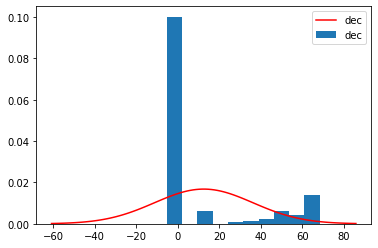

In [49]:
distribucion(STAR["dec"],"dec")

In [52]:
STAR = df_oversampled[df_oversampled["class"] == "STAR"]
GALAXY = df_oversampled[df_oversampled["class"] == "GALAXY"]
QSO = df_oversampled[df_oversampled["class"] == "QSO"]

STAR = limpiar(STAR,"dec")
GALAXY = limpiar(GALAXY,"dec")
QSO = limpiar(QSO,"dec")

STAR = limpiar(STAR,"u")
GALAXY = limpiar(GALAXY,"u")
QSO = limpiar(QSO,"u")

STAR = limpiar(STAR,"g")
GALAXY = limpiar(GALAXY,"g")
QSO = limpiar(QSO,"g")

STAR = limpiar(STAR,"r")
GALAXY = limpiar(GALAXY,"r")
QSO = limpiar(QSO,"r")

STAR = limpiar(STAR,"i")
GALAXY = limpiar(GALAXY,"i")
QSO = limpiar(QSO,"i")

STAR = limpiar(STAR,"z")
GALAXY = limpiar(GALAXY,"z")
QSO = limpiar(QSO,"z")

STAR = limpiar(STAR,"run")
GALAXY = limpiar(GALAXY,"run")
QSO = limpiar(QSO,"run")

STAR = limpiar(STAR,"field")
GALAXY = limpiar(GALAXY,"field")
QSO = limpiar(QSO,"field")

STAR = limpiar(STAR,"specobjid")
GALAXY = limpiar(GALAXY,"specobjid")
QSO = limpiar(QSO,"specobjid")



STAR = limpiar(STAR,"redshift")
GALAXY = limpiar(GALAXY,"redshift")
QSO = limpiar(QSO,"redshift")



STAR = limpiar(STAR,"plate")
GALAXY = limpiar(GALAXY,"plate")
QSO = limpiar(QSO,"plate")



STAR = limpiar(STAR,"mjd")
GALAXY = limpiar(GALAXY,"mjd")
QSO = limpiar(QSO,"mjd")

STAR = limpiar(STAR,"fiberid")
GALAXY = limpiar(GALAXY,"fiberid")
QSO = limpiar(QSO,"fiberid")

In [53]:
#df_norm = QSO.sample(4152, replace = True)

df_norm = pd.concat([STAR, GALAXY, QSO], axis= 0)
print(counts(df_norm,"class","",""))

{'STAR': 3933, 'GALAXY': 4541, 'QSO': 3213}


## 3.2 - Haremos oversample de nuevo para balancear los datos

In [54]:
QSO = QSO.sample(4541, replace = True)
STAR = STAR.sample(4541, replace = True)

df_norm = pd.concat([STAR, GALAXY, QSO], axis= 0)
print("Cuenta: ", counts(df_norm,"class","",""))

Cuenta:  {'STAR': 4541, 'GALAXY': 4541, 'QSO': 4541}


## 3.3 Ahora se probará el aprendizaje con los grupos normalizados, pero con X_test, e Y_test originales.

In [55]:
Y = df_norm.iloc[:,10]
X = df_norm.drop(labels="class", axis=1)
#X.head()
X_train, X_test_norm, Y_train, Y_test_norm = train_test_split(X, Y, test_size = .5, random_state=25)

In [56]:
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


In [57]:
#Predicción y matriz de confusión
Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))

[[2436   31   15]
 [ 132 1932    0]
 [   5    2 2098]]
              precision    recall  f1-score   support

      GALAXY       0.95      0.98      0.96      2482
         QSO       0.98      0.94      0.96      2064
        STAR       0.99      1.00      0.99      2105

    accuracy                           0.97      6651
   macro avg       0.97      0.97      0.97      6651
weighted avg       0.97      0.97      0.97      6651



Pareciera que eliminar los datos "atípicos" no ha servido de mucho, de hecho, el recall para QSO ha decrecido en un 6%, ha aumentado en un 2% el de GALAXY, pero a causa de esto mismo: la precisión también a bajado en un 2% para QSO, y ha subido en un 4% para GALAXY.
## Tabla anterior:
#### ---------------- precision ---- recall 
#### GALAXY ------ 0.99 --------- 0.97 
#### QSO ------------ 0.97 --------- 1.00 
#### STAR ----------- 0.99 -------- 1.00  


## 3.4 - Random Forest con datos limpios

In [58]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))

[[2382   21   79]
 [  88 1928   48]
 [   1    0 2104]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96      2482
         QSO       0.99      0.93      0.96      2064
        STAR       0.94      1.00      0.97      2105

    accuracy                           0.96      6651
   macro avg       0.97      0.96      0.96      6651
weighted avg       0.97      0.96      0.96      6651



Ahora que hemos normalizado los datos: la precisión y el recall en general han bajado en comparación con los datos originales sin limpiar.

Tal parece que los datos atípicos son necesarios en ciertos casos (y este es uno de esos casos), para que los algoritmos alcancen a detectar e identificar ciertas características atípicas para clasificarlas correctamente.

Random Forest tiene mejor predicción con los datos sin normalizar, tal ves sea por la cantidad de subárboles que se generan (a diferencia del árbol binario que genera la librería "tree"), esto segrega aún más los datos, y hace más fácil identificar que a que clase pertenece una muestra

# 4. - En conclusión:

Me quedaría con Random Forest en este caso, ya que dió el mejor índice de precisión y recall entre los 3 algoritmos que se usaron

In [39]:
print(df_oversampled.head())
#Separamos las características de las clases
Y = df_oversampled.iloc[:,10]
X = df_oversampled.drop(labels="class", axis=1)
#X.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5, random_state=25)

           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
5  183.847174  0.173694  19.43133  18.46779  18.16451  18.01475  18.04155   

   run  field     specobjid  ...  redshift  plate    mjd  fiberid  camcol_1  \
0  752    267  3.722360e+18  ... -0.000009   3306  54922      491         0   
1  752    267  3.638140e+17  ... -0.000055    323  51615      541         0   
3  752    269  3.722370e+18  ... -0.000111   3306  54922      510         0   
4  752    269  3.722370e+18  ...  0.000590   3306  54922      512         0   
5  752    269  3.649550e+17  ...  0.000315    324  51666      594         0   

   camcol_2  camcol_3  camcol_4  camcol_5  camcol_6  
0       

In [60]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
matriz = confusion_matrix(Y_test, Y_pred)
print(matriz)

#Métricas
print(classification_report(Y_test, Y_pred))

[[2380   19   83]
 [  88 1933   43]
 [   1    0 2104]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96      2482
         QSO       0.99      0.94      0.96      2064
        STAR       0.94      1.00      0.97      2105

    accuracy                           0.96      6651
   macro avg       0.97      0.96      0.96      6651
weighted avg       0.97      0.96      0.96      6651

